In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import csv

file1_path = 'testtext.txt'
file2_path = 'testtext_label.txt'
output_file_path = '_train.csv'

dat = {'text': [], 'sentiment': []}

# อ่านข้อมูลจากไฟล์1
with open(file1_path, 'r', encoding='utf-8') as file1:
    data1 = file1.readlines()
    dat['text'] = [line.strip() for line in data1]

# อ่านข้อมูลจากไฟล์2
with open(file2_path, 'r', encoding='utf-8') as file2:
    data2 = file2.readlines()
    dat['sentiment'] = [line.strip() for line in data2]

with open(output_file_path, 'w', newline='', encoding='utf-8-sig') as csv_file:
    csv_writer = csv.writer(csv_file)

    # เขียนหัวข้อคอลัมน์
    # csv_writer.writerow(["sentiment", "text"])

    # เขียนข้อมูลลงในไฟล์ CSV
    for sentiment, text in zip(dat['sentiment'], dat['text']):
        sentiment = sentiment.strip()
        text = text.strip()

        # ข้ามหากค่า "q" ในทั้งสองไฟล์
        if sentiment == "q" or text == "q":
            continue

        # ข้าม index ที่มีค่า "q" ในไฟล์ "train_label.txt"
        if sentiment == "train" and text == "q":
            continue

        csv_writer.writerow([sentiment, text])

# df = pd.read_csv(output_file_path, names=['category', 'texts'], header=None, encoding='utf-8-sig')
# df
# df = pd.read_csv('convert.csv', names=['texts', 'category'], header=None)
# สร้างคำสั่งแมปเพื่อแปลงค่า label เป็นตัวเลขตามที่ต้องการ
label_mapping = {'neu': 1, 'neg': 0, 'pos': 2}

# อ่านไฟล์ CSV และใช้ฟังก์ชันแมปเพื่อแปลงค่า label
df = pd.read_csv('_train.csv', names=['category', 'texts'], header=None)
df['category'] = df['category'].map(label_mapping)
df

,category,texts
0,0,☹️
1,0,😔
2,0,😞
3,0,😥
4,0,รำ
...,...,...
26157,2,พูดถึงรถยนต์ตัวท็อปที่อีซูซุผลิต หนึ่งในนั้นต้...
26158,2,เรื่องประทับใจเกิดที่ the mall บางแค ค่ะ ❤️ เป...
26159,2,🌞แสงแดดเมืองไทย โดยเฉพาะหน้าร้อนอย่างเดือนเมษา...
26160,2,เราชื่นชอบและเป็นลูกค้าที่ใช้บริการ มานานถึง 3...


<Axes: xlabel='category'>

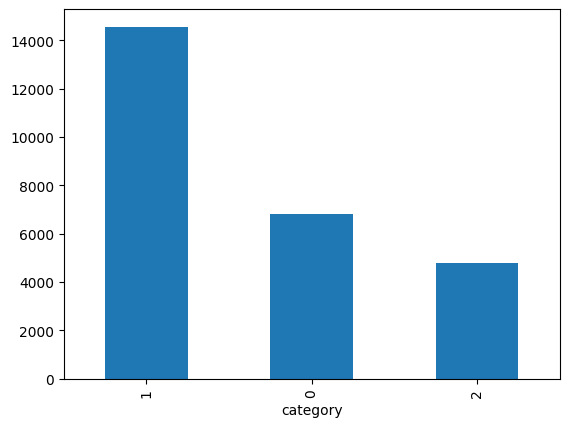

In [16]:
df['category'].value_counts().plot.bar()

In [17]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

# len(thai_stopwords)
thai_stopwords

['พบว่า',
 'หากแม้นว่า',
 'รวม',
 'ทีไร',
 'ล้วน',
 'จึงเป็น',
 'เกี่ยวๆ',
 'พอที่',
 'ยิ่ง',
 'แต่ว่า',
 'พวกคุณ',
 'อัน',
 'เมื่อก่อน',
 'หาใช่',
 'ภายหน้า',
 'เรื่อยๆ',
 'ก็',
 'ยืนยาว',
 'เรา',
 'ยืนยง',
 'เก็บ',
 'เสร็จ',
 'นอกจาก',
 'เป็นที',
 'ยิ่งนัก',
 'มันๆ',
 'หมดสิ้น',
 'ไกล',
 '\ufeffๆ',
 'มัก',
 'ไป่',
 'คะ',
 'หาก',
 'ข้างต้น',
 'ระยะ',
 'ถ้าหาก',
 'มิใช่',
 'จ๋า',
 'หลาย',
 'ยังโง้น',
 'ก็ต่อเมื่อ',
 'ถึงบัดนั้น',
 'จวบ',
 'ทาง',
 'กันดีกว่า',
 'นำมา',
 'กล่าว',
 'บาง',
 'เช่นก่อน',
 'แค่ว่า',
 'ตลอดกาล',
 'เต็มๆ',
 'ที่ว่า',
 'รวมกัน',
 'อันที่',
 'ข้าฯ',
 'นอกจากนี้',
 'รวมถึง',
 'วัน',
 'ขณะนั้น',
 'ส่วนใหญ่',
 'ณ',
 'กำลัง',
 'พอควร',
 'ต่อกัน',
 'นำ',
 'พวกกัน',
 'พวกท่าน',
 'เพียงแค่',
 'ต่างหาก',
 'ที่ซึ่ง',
 'ขึ้น',
 'คราวนั้น',
 'เอา',
 'แห่ง',
 'บางขณะ',
 'สิ่งไหน',
 'ครั้งใด',
 'พวกมึง',
 'มั้ยล่ะ',
 'อย่างละ',
 'ไม่ค่อย',
 'ค่อนข้างจะ',
 'ได้แต่',
 'เมื่อวันวาน',
 'ด้วยเหมือนกัน',
 'หน',
 'ผล',
 'ได้รับ',
 'ฯลฯ',
 'สั้น',
 'แค่เพียง',
 'นับตั้งแต่',
 'คราวหน

In [18]:
from pythainlp import word_tokenize
def text_process(text):
    # final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/","�","😅","💨","😬","👍🏻","‼️","@","/","<",">","😂","😭","☺️","❤️","😍","%",")","(","*","\"","'",",",".","”","&","^","!","~","-","+","{","}","[","]","?"
    #                                              ,"A","a","B","b","C","c","D","d","E","e","F","f"
    #                                              ,"G","g","H","h","I","i","J","j","K","k","L","l"
    #                                              ,"M","m","N","n","O","o","P","p","Q","q","R","r"
    #                                              ,"S","s","T","t","U","u","V","v","W","w","X","x"
    #                                              ,"Y","y","Z","z","1","2","3","4","5","6","7","8","9","0"
    #                                              ,"=","_","-","$","\"","|","£","¥","®","¯","▽","¼","½","¾"
    #                                              ,"É","×","á","ä","é","ò","ô","ûé"))
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['texts'].apply(text_process)
df.to_csv("text_tokent.csv", index=False, encoding='utf-8-sig')
df

,category,texts,text_tokens
0,0,☹️,☹️
1,0,😔,😔
2,0,😞,😞
3,0,😥,😥
4,0,รำ,รำ
...,...,...,...
26157,2,พูดถึงรถยนต์ตัวท็อปที่อีซูซุผลิต หนึ่งในนั้นต้...,พูดถึง รถยนต์ ตัว ท็อป ที่ อีซูซุ ผลิต หนึ่ง ใ...
26158,2,เรื่องประทับใจเกิดที่ the mall บางแค ค่ะ ❤️ เป...,เรื่อง ประทับใจ เกิด ที่ the mall บางแค ค่ะ ❤️...
26159,2,🌞แสงแดดเมืองไทย โดยเฉพาะหน้าร้อนอย่างเดือนเมษา...,🌞 แสงแดด เมือง ไทย โดยเฉพาะ หน้าร้อน อย่าง เดื...
26160,2,เราชื่นชอบและเป็นลูกค้าที่ใช้บริการ มานานถึง 3...,เรา ชื่นชอบ และ เป็น ลูกค้า ที่ ใช้ บริการ มา ...


In [19]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_
# Get the vocabulary
vocabulary = cvec.vocabulary_

# Convert vocabulary to DataFrame
df_vocabulary = pd.DataFrame(list(vocabulary.items()), columns=['Word', 'Index'])

# Save the vocabulary to a CSV file
# df_vocabulary.to_csv("vocabulary.csv", index=False, encoding='utf-8-sig')
df_vocabulary

,Word,Index
0,ซื้อ,13970
1,ของ,11619
2,7,1434
3,-,161
4,11,451
...,...,...
29973,อัลกอฮอล์,23350
29974,อยู่ท้อง,23144
29975,อัลลอยด์,23361
29976,HondaAccordHybrid,3821


In [21]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt = pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt

,,$,%,%(,%),%*,%***,%=,%ค้ะ,%”,...,🦎🦎🦎,🦏,🦐🦐,🦕,🧐,🧐🧐,🧚🏼‍♀️🧚🏼‍♀️,🧡,🧡🧡,🧢
text_tokens,,,,,,,,,,,,,,,,,,,,,
ซื้อ ของ 7 - 11 มัน ไม่ค่อย จ่าย ส่วน ที่ เป็น สตางค์ พอ จะ ซื้อ เบียร์ สิงห์ ป๋อง 4250 มี ตังค์ 42 บาท ซื้อ ไม่ ได้ เอาเปรียบ ผู้บริโภค,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
มึง สั่ง แค่นี้ พอ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ทำไม ถึง ใช้ รี โว่ คับ เห้น คนอื่น ใช้ ดี แม๊ก มี ที เด็จ กว่า คัน อื่น ยังไง,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ดี แม็ก สี ดำ ที พา ไปดู ราคา เท่าไหร่ ครับ 4 ประตู,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
หิว เลย อะ น่ากิน มาก 😭,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
วัง แห่ง นี้ อยู่ ภายใต้ การ ดูแล ของ สำนักงาน ทรัพย์สิน ส่วน พระมหากษัตริย์ และ เล่นแร่แปรธาตุ ให้ เอกชน เช่า ที่ดิน ไป ธุรกิจ โดย ตระกูล เต ชะ ไพบูลย์,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แคม รี่ ค่ะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20 ลิตร ของ Raptor เรียก พลัง ได้ 215 แรงม้า 500 นิวตัน โหด จริง ทีแรก นึก ว่า เครื่อง นิสสัน จะ ได้ 200 + แล้ว นะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import pandas as pd

texts = []
labels = []
dat = {'text': [], 'sentiment': []}

with open("./New folder/test2.txt", 'r', encoding='utf-8') as file1:
    data1 = file1.readlines()
    dat['text'] = [line.strip() for line in data1]

with open("./New folder/test2_labels.txt", 'r', encoding='utf-8') as file2:
    data2 = file2.readlines()
    dat['sentiment'] = [line.strip() for line in data2]

test_df = pd.DataFrame({'category': dat['sentiment'], 'texts': dat['text']})
label_mapping = {'neu': 1, 'neg': 0, 'pos': 2}
test_df['category'] = test_df['category'].map(label_mapping)


test_df



,category,texts
0,0,กูเกลียดมึง
1,0,ไม่ชอบ
2,2,ดีมากเลย
3,2,ไม่แย่เลย
4,1,สวัสดีครับ
5,1,ครับ


In [61]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text_tokens'])
X = tokenizer.texts_to_sequences(df['text_tokens'])
X = pad_sequences(X)
X_test = tokenizer.texts_to_sequences(test_df['texts'])
X_test = pad_sequences(X_test)
y = df['category']
y_test = test_df['category']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(3, activation='softmax'))  # Change units to match number of classes and use softmax activation

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=128, validation_data=(X_test, y_test))

# # Predictions on the test set
test_predictions = model.predict(X_test)


82/82 [==============================] - 3s 35ms/step


In [62]:
# Convert the probabilities to class labels
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Print classification report
print(classification_report(y_test, test_predictions_classes))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       671
           1       0.72      0.86      0.78      1457
           2       0.59      0.27      0.37       489

    accuracy                           0.71      2617
   macro avg       0.68      0.61      0.62      2617
weighted avg       0.70      0.71      0.69      2617

